In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
df=pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In this dataframe we have data about medical insurance cost in which we are going to predict cost of insurance as per components given.
* First component is age which will be playing a major role in our dataset as indurance cost is very much dependent on age in general.
* Second is gender, which will help us to predict that how gender is affecting cost of insurance.
* Third one is (BMI)Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9. 
* Fourth one is about children, it states if the person whom we are giving policy is having children or not and if have, then how much he/she have and which are covered under this health insurance policy.
* Fifth one is smoker that dedfines that if the person smokes or not. 
* Sixth one is region which will help us to predict how region is affecting cost of insurance policy.
* And the last one is charges, which is our target variable and will help us to analyis data as per independent variable and will help us to predict cost as per given component and other independent date will enter.

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In this we can see first5 rows of our data.

In [18]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Here we can see first5 rows of our data.

In [23]:
df.shape

(1338, 7)

By this we can understand that our database is having 1338 rows and 7 columns

In [24]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Here we have define all the column names of our dataset.

In [25]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

We can see that we are having 3 different datatypes i.e.(int64,object and float64)

In [27]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(np.number)

In [55]:
df_cat

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [57]:
df_cat['sex']=pd.get_dummies(df_cat['sex'],drop_first=True)

In [59]:
df_cat['smoker']=pd.get_dummies(df_cat['smoker'],drop_first=True)


<Axes: >

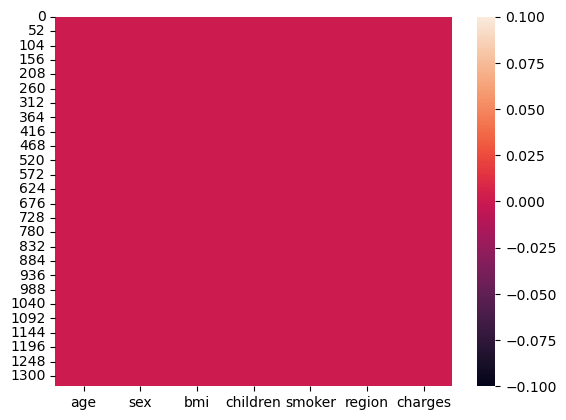

In [31]:
sns.heatmap(df.isnull())

By the above heatmap we can see that there is no null value present in ur dataset as the entire box in same colour which is closer to 0 null value.

In [4]:
df.nunique().to_frame("Unique values")

,Unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [68]:
df.duplicated().sum()

1

We can see here that we are having 1 dulicate row in our dataframe in which all the components are same with one of the another row so let us remove one row so that we can predict our solution effectively

In [3]:
df1=df.drop_duplicates()

In [70]:
df1.duplicated().sum()

0

We can see that duplicate row has been successfully rwemoved from our dataframe now.

In [62]:
df1.shape

(1337, 7)

Earlier we were having 1338 rows however after removal of duplicate row we are only having 1337 rows, this means we have successfully removed the dulicated row.

In [63]:
df1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Following is the complete analysis of data in which we can see that our data is absolutely perfect as we are not getting any negative value.

Here are some observation as per above date.

We can see that the count of all columns are same it means our data is perfect and ready to work with.

We can not see much difference in mean and median of independent variable it means they are not much skewed howver we can see that mean of our target variable that is target is much greater that it's median this means it is right skewed.

By analysing the data we can see that there is huge difference in 75 percentile and maximum value of age and charges this means there is high chances of having utliers in it.

In [64]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


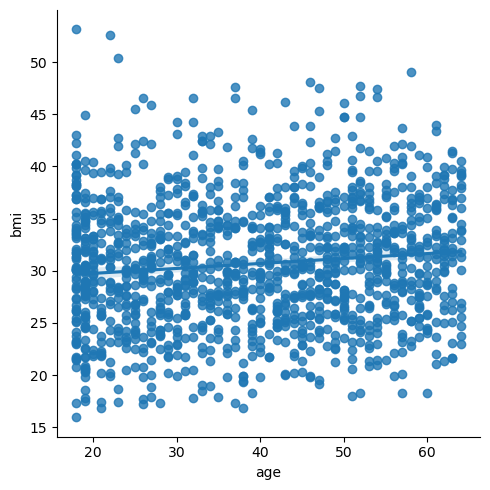

In [21]:
sns.lmplot(x='age',y='bmi',data=df1,palette='colorblind')

We can see that our best fit line is not showing any relation between both variable.

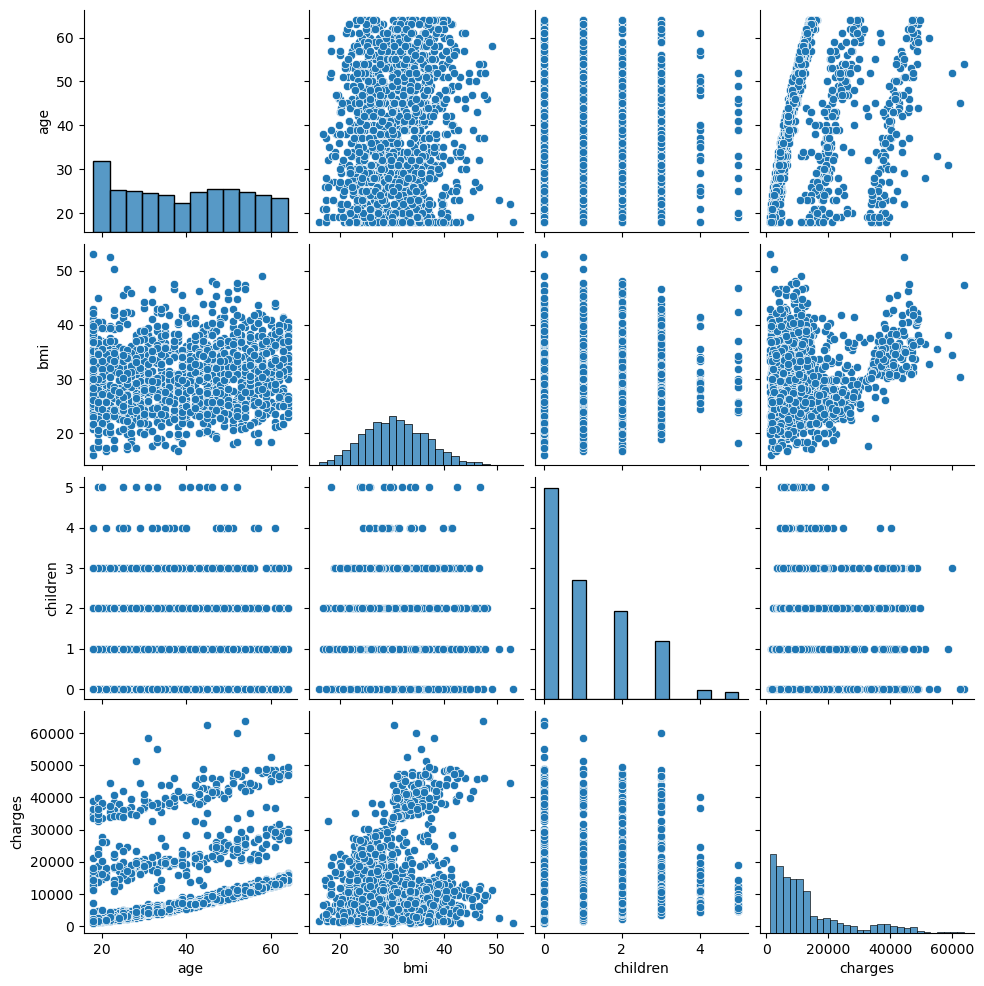

In [25]:
sns.pairplot(data=df1,palette="dark1")

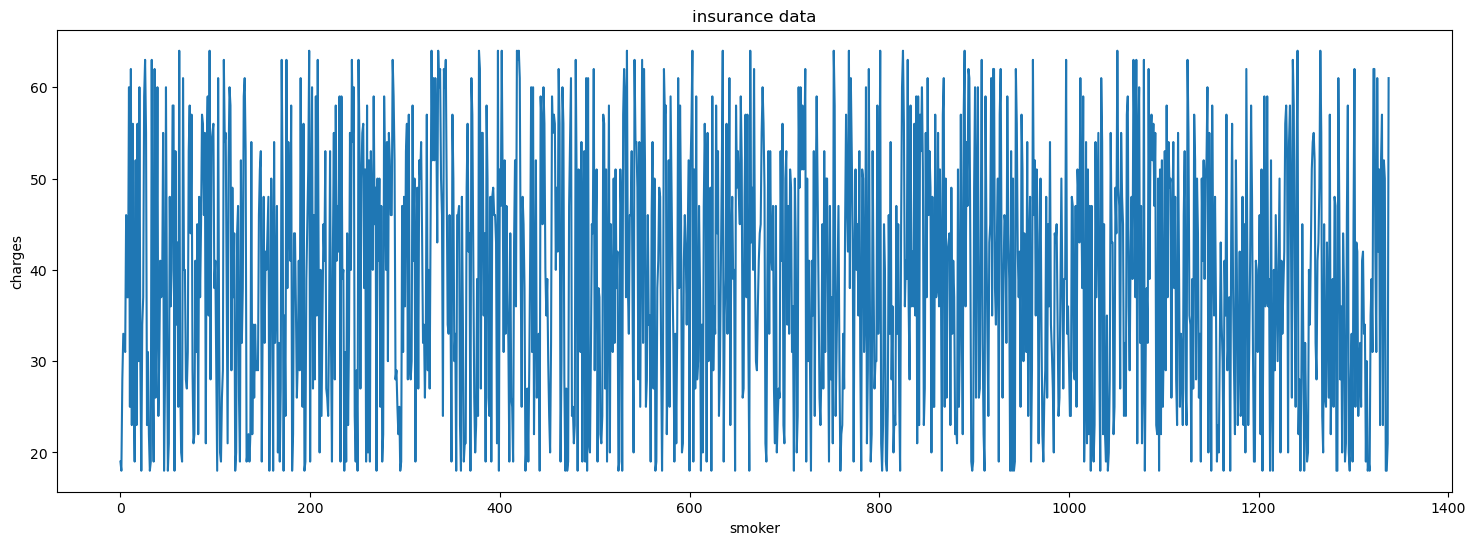

In [28]:
plt.figure(figsize=(18,6))
plt.plot(df1.age,label='age of policy holder')
plt.ylabel('charges')
plt.xlabel('smoker')
plt.title('insurance data')
plt.show()

Text(0.5, 1.0, 'General trend')

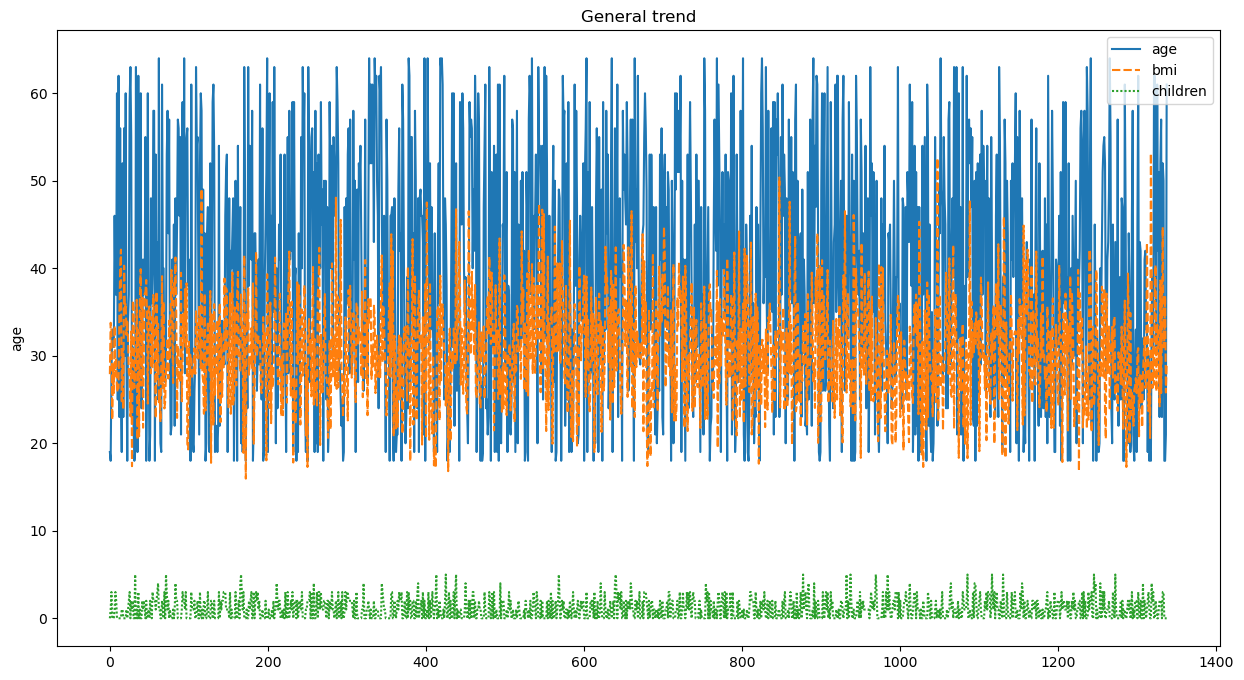

In [66]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df.iloc[:,:-1])
plt.ylabel('age')
plt.title('General trend')

<Axes: >

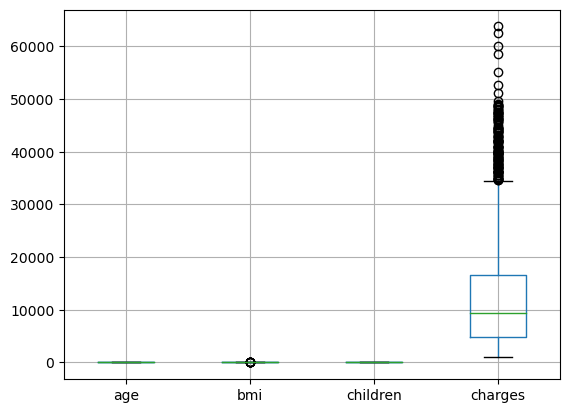

In [67]:
# we are done with graphical analysis, let's check outliers by plotting a boxplot
df1.boxplot()

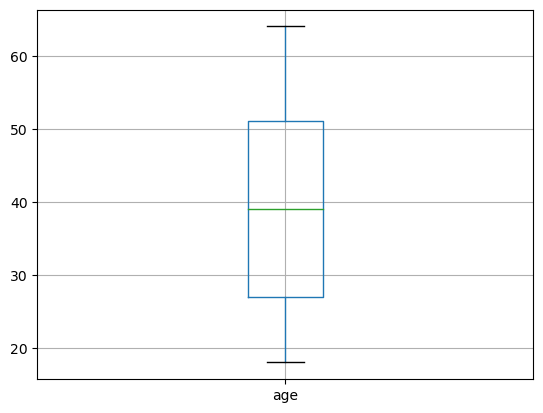

In [48]:
Box1=df1.boxplot(column="age")

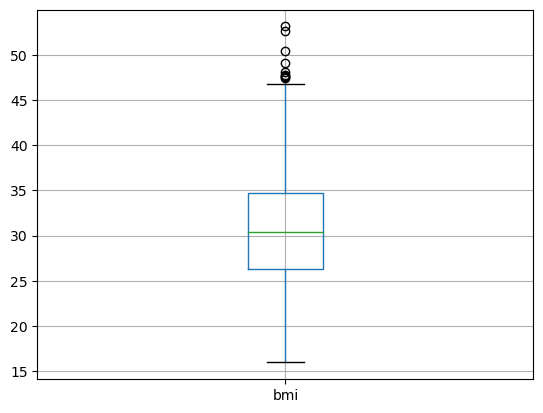

In [49]:
Box1=df1.boxplot(column="bmi")

Text(0.5, 1.0, '')

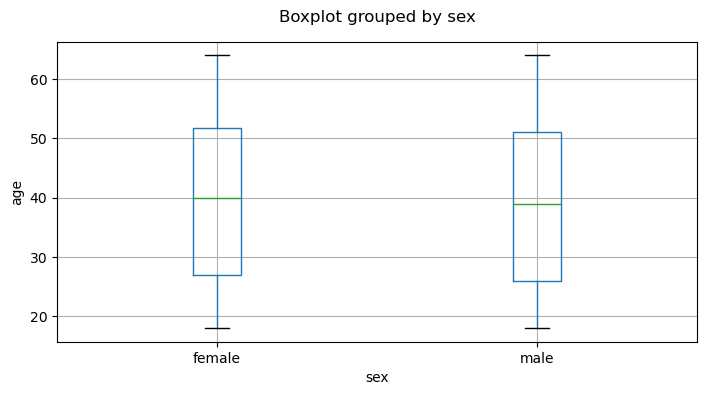

In [45]:
Box=df1.boxplot(column="age", by="sex", figsize=(8,4))
Box.set_ylabel("age")
Box.set_title("")

with the help of above analysis we can see that we are having outliers in bmi, charges and age column however we'll only remove it from bmi and age as we do not remove outliers from our target variable.

In [5]:
outliers=df1[['age','bmi']]
z=np.abs(zscore(outliers))
z

,age,bmi
0,1.440418,0.453160
1,1.511647,0.509422
2,0.799350,0.383155
3,0.443201,1.305052
4,0.514431,0.292456
...,...,...
1333,0.767704,0.050269
1334,1.511647,0.206053
1335,1.511647,1.014490
1336,1.297958,0.797524


In [9]:
np.where(z>3)

(array([ 116,  846, 1046, 1316], dtype=int64),
 array([1, 1, 1, 1], dtype=int64))

In [6]:
new_df=df1[(z<3).all(axis=1)]

In [10]:
new_df.shape

(1333, 7)

Here we have removed  outliers from our data 

In [15]:
#let's check our dataloss to determine if Zscore method of removing outliers is affordable or not.

print("dataloss =", ((df1.shape[0] - new_df.shape[0]) /df1.shape[0])*100)

dataloss = 0.2991772625280479


We can see that is a minimal dataloss so we can continue with this data

In [17]:
new_df.skew()

age         0.052714
bmi         0.205541
children    0.934451
charges     1.517177
dtype: float64

Here we can clearly see that there is skewness in our charges and childern column

In [20]:
#Let's remove skewness from our data by cuberoot method
new_df['children']=np.cbrt(new_df['children'])
new_df['charges']=np.cbrt(new_df['charges'])


In [22]:
new_df.skew()

age         0.052714
bmi        -0.126605
children   -0.099737
charges     0.516562
dtype: float64

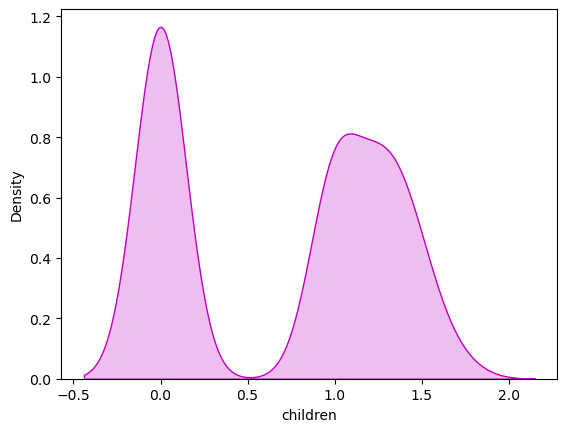

In [30]:
sns.distplot(new_df['children'],color="m",kde_kws={"shade":True},hist=False)
plt.show()

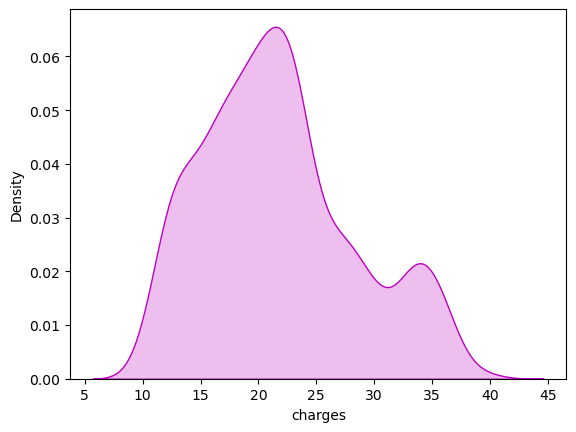

In [31]:
sns.distplot(new_df['charges'],color="m",kde_kws={"shade":True},hist=False)
plt.show()

We can see by above plot that skewness has been reduces not as the plot is looking something like normally distributed

In [32]:
#let's check correlation between our data

new_df.corr()

,age,bmi,children,charges
age,1.000000,0.122085,0.048702,0.451897
bmi,0.122085,1.000000,0.018990,0.163697
children,0.048702,0.018990,1.000000,0.126341
charges,0.451897,0.163697,0.126341,1.000000


We can see that there is no high correlation between dependent and independent variables so there will not be chance of multi collenearity issue

In [33]:
df.corr().charges.sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

In [21]:
new_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
#Now lets seperate our dependent and independent variable as Y and x variable.
x=new_df.iloc[:,1:7]
y=new_df["charges"]

In [50]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (1333, 6)
dimension of dependent variable: (1333,)


In [17]:
#Let's import neccesary libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [18]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = 42)

In [19]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict (x_test)
pred_train=dtr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_DTR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_DTR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_DTR)))

ValueError: could not convert string to float: 'female'